In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

path = os.path.realpath(os.path.join(os.getcwd(),'../'))
sys.path.insert(0, path)
import astro_ts_datasets
import medical_ts_datasets

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
tf.compat.v1.enable_eager_execution()

In [4]:
as_supervised = True
split = 6
split = 'train[:{0}%]+test[:{1}%]'.format(split, split)

In [5]:
dataset, info = tfds.load(name='spcc_sn1a', split=split, with_info=True, as_supervised=as_supervised)

In [6]:
print(info)

tfds.core.DatasetInfo(
    name='spcc_sn1a',
    version=1.0.10,
    description='',
    homepage='https://www.tensorflow.org/datasets/catalog/spcc_sn1a',
    features=FeaturesDict({
        'metadata': FeaturesDict({
            'object_id': tf.uint32,
            'redshift': tf.float32,
        }),
        'static': Tensor(shape=(2,), dtype=tf.float32),
        'static_errors': Tensor(shape=(2,), dtype=tf.float32),
        'targets': FeaturesDict({
            'class': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
        }),
        'time': Tensor(shape=(None,), dtype=tf.float32),
        'value_errors': Tensor(shape=(None, 4), dtype=tf.float32),
        'values': Tensor(shape=(None, 4), dtype=tf.float32),
    }),
    total_num_examples=21319,
    splits={
        'test': 20216,
        'train': 1103,
    },
    supervised_keys=('combined', 'target'),
    citation="""@article{kessler2010results,
      title={Results from the supernova photometric classification challenge},
  

In [7]:
def preprocess(*data):
    if as_supervised:
        inputs, label = data
        static, times, values, measurements, lengths = inputs[0:5]
        times = times - times[0]
        values = tf.where(measurements, values, tf.zeros_like(values))
        return inputs, label
    else:
        return data

In [8]:
dataset = dataset.map(preprocess)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1


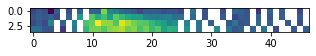

0


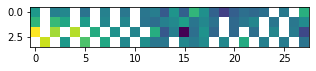

0


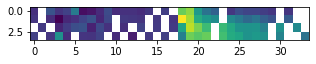

1


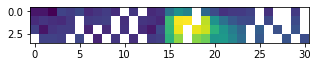

0


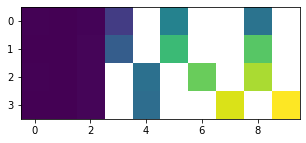

0


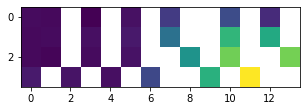

1


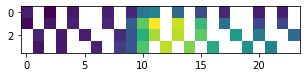

1


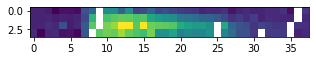

0


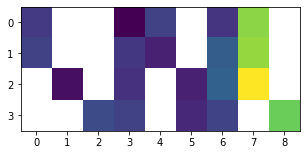

1


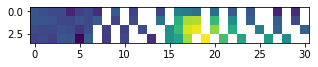

1


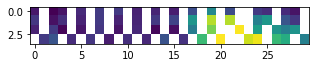

0


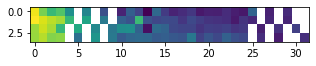

1


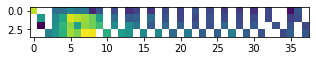

1


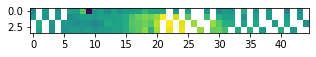

1


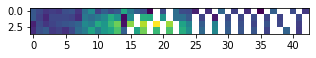

0


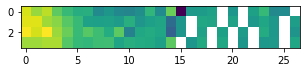

0


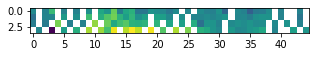

0


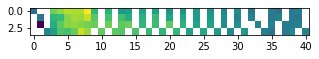

1


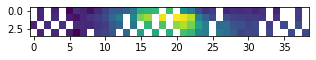

0


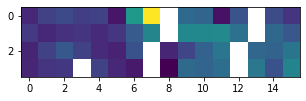

In [14]:
for d in dataset.take(20):
    inputs, label = d
    static, times, values, measurements, lengths = inputs[0:5]
    print(label.numpy())
    plt.figure(figsize=(5,4))
    plt.imshow(values.numpy().T)
    plt.show()